In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import copy

filePath = "C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/TextData/"
#filePath = "C:/Users/sim4/Desktop/Constrained-Projective-Dynamics/GenPD/GenPD/TextData"
filePathForOverHead = "C:/Users/JeongWooSEok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/TextData/"
#filePathForOverHead = filePath


In [110]:
def getData(path, col, point, flag = 1):

    if flag == 1: #[[], [], [], ...]
        f = open(path, "r")
        lines = f.readlines()

        a = [[] for i in range (0,col)]

        for line in lines:
            item = line.split(point)
            for i in range (0, col):
                a[i].append(item[i])
                
    elif flag == 2: # [[[], [], [], ...], ...] 3차원임 
        f = open(path, "r")
        lines = f.readlines()

        a = [[[]for j in range (0, col)] for i in range (0,300)]
        
        index = 0

        for line in lines:
            if line.find('a') != -1: #a 있는줄 거르기
                index += 1
                continue;
            else:
                item = line.split(point)
                for i in range (0, col):
                    a[index][i].append(item[i])
                    
    elif flag == 21: #for FEPR iter check fepr 이터레이션 세는 용도
        f = open(path, "r")
        lines = f.readlines()
      
        a = []
        
        for line in lines:
            if line.find('a') != -1:
                    a.append(line[line.find('a') + 1:len(line) - 1])
                    
    elif flag == 3: #for CPD?
        f = open(path, "r")
        lines = f.readlines()
        
        a = [[], []]
        
        for line in lines:
            if line.find('a') != -1:
                item = line.replace("a", "")
                a[0].append(item)
            elif line.find('b') != -1:
                continue;
            else:
                a[1].append(line)
                
    elif flag == 4: #for CPD iter. 나중에 위에랑 합쳐도 될듯 아닌가.
        f = open(path, "r")
        lines = f.readlines()
        
        a = [[], []]
        
        for line in lines:
            if line.find('b') != -1:
                a[0].append(line[0:line.find('b')])
                a[1].append(line[line.find('b') + 1:len(line) - 1])
                
    elif flag == 32: #for CPD Loss/ col used to frame.
        f = open(path, "r")
        lines = f.readlines()
        
        a = [[] for i in range(col)]
        index = 0;
        
        for line in lines:
            item = line.split(point)
            for items in item:
                a[index].append(items)
            index += 1
                    
        
    elif flag == 5: #for quantities. col used to frame 운동량, 에너지 받기.
        f = open(path, "r")
        lines = f.readlines()
        
        a = [[] for i in range(col)]
        index = 0;
        
        for line in lines:
            item = line.split(point)
            if index%3 == 0 :
                for j in range(3):
                    a[int(index/3)].append(item[j])
            elif index%3 == 1:
                for j in range(3):
                    a[int(index/3)].append(item[j])
            else :
                a[int(index/3)].append(item[0])
            index += 1
        
        
    return a
    

In [98]:
sphere = getData(filePath + "sphere.txt", 2, "\t") # 200 lines
cube = getData(filePath + "cube.txt", 2, "\t") # 200 lines
hippo = getData(filePath + "hippo.txt", 2, "\t") # 200 lines
torus = getData(filePath + "torus.txt", 2, "\t") # 200 lines
cloth = getData(filePath + "cloth.txt", 2, "\t") # 200 lines

sphere[0] = list(map(int, sphere[0]))
sphere[1] = list(map(int, sphere[1]))

cube[0] = list(map(int, cube[0]))
cube[1] = list(map(int, cube[1]))

hippo[0] = list(map(int, hippo[0]))
hippo[1] = list(map(int, hippo[1]))

torus[0] = list(map(int, torus[0]))
torus[1] = list(map(int, torus[1]))

cloth[0] = list(map(int, cloth[0]))
cloth[1] = list(map(int, cloth[1]))

sumPDData = [sum(sphere[0]), sum(sphere[1]),
           sum(cube[0]), sum(cube[1]),
           sum(hippo[0]), sum(hippo[1]),
           sum(torus[0]), sum(torus[1]),
           sum(cloth[0]), sum(cloth[1])]


for i in range(0, 10):
    sumPDData[i] = sumPDData[i] / 1000000 / 300 #ns to ms
    
    
dummyDataForOurs = sumPDData
dummyDataForFEPR = sumPDData

    
dataRatio = [sumPDData[0]/sumPDData[1],
             sumPDData[2]/sumPDData[3],
             sumPDData[3]/sumPDData[4],
             sumPDData[5]/sumPDData[6],
             sumPDData[7]/sumPDData[8]]

In [95]:
pathText = "CPDOverHead.txt"

CPDOverHeadData_sphere = getData( filePathForOverHead + "sphere" + pathText,1, 0,3) 
CPDOverHeadData_cube = getData( filePathForOverHead + "cube" + pathText,1, 0,3) 
CPDOverHeadData_hippo = getData( filePathForOverHead + "hippo" + pathText,1, 0,3) 
CPDOverHeadData_torus = getData( filePathForOverHead + "torus" + pathText,1, 0,3) 
CPDOverHeadData_cloth = getData( filePathForOverHead + "cloth" + pathText,1, 0,3) 

CPDOverHeadData_sphere[0] = list(map(int, CPDOverHeadData_sphere[0]))
CPDOverHeadData_sphere[1] = list(map(int, CPDOverHeadData_sphere[1]))

CPDOverHeadData_cube[0] = list(map(int, CPDOverHeadData_cube[0]))
CPDOverHeadData_cube[1] = list(map(int, CPDOverHeadData_cube[1]))

CPDOverHeadData_hippo[0] = list(map(int, CPDOverHeadData_hippo[0]))
CPDOverHeadData_hippo[1] = list(map(int, CPDOverHeadData_hippo[1]))

CPDOverHeadData_torus[0] = list(map(int, CPDOverHeadData_torus[0]))
CPDOverHeadData_torus[1] = list(map(int, CPDOverHeadData_torus[1]))

CPDOverHeadData_cloth[0] = list(map(int, CPDOverHeadData_cloth[0]))
CPDOverHeadData_cloth[1] = list(map(int, CPDOverHeadData_cloth[1]))

sumCPDOverhead = [sum(CPDOverHeadData_sphere[0]), sum(CPDOverHeadData_sphere[1]),
                  sum(CPDOverHeadData_cube[0]), sum(CPDOverHeadData_cube[1]),
                  sum(CPDOverHeadData_hippo[0]), sum(CPDOverHeadData_hippo[1]),
                  sum(CPDOverHeadData_torus[0]), sum(CPDOverHeadData_torus[1]),
                  sum(CPDOverHeadData_cloth[0]), sum(CPDOverHeadData_cloth[1])]

for i in range(0, 10):
    sumCPDOverhead[i] = sumCPDOverhead[i] / 1000000 / 300 #ns to ms

In [101]:
pathText = "feprLossnOverhead.txt"

FEPROverHeadData_sphere = getData( filePathForOverHead + "10sphere" + pathText,2, "\t", 2) 
FEPROverHeadData_cube = getData( filePathForOverHead + "10cube" + pathText,2, "\t", 2) 
FEPROverHeadData_hippo = getData( filePathForOverHead + "10hippo" + pathText,2, "\t", 2) 
FEPROverHeadData_torus = getData( filePathForOverHead + "10torus" + pathText,2, "\t", 2) 
FEPROverHeadData_cloth = getData( filePathForOverHead + "10cloth" + pathText,2, "\t", 2) 


for i in range(300):
    FEPROverHeadData_sphere[i][0] = list(map(float, FEPROverHeadData_sphere[i][0]))
    FEPROverHeadData_sphere[i][1] = list(map(int, FEPROverHeadData_sphere[i][1]))

    FEPROverHeadData_cube[i][0] = list(map(float, FEPROverHeadData_cube[i][0]))
    FEPROverHeadData_cube[i][1] = list(map(int, FEPROverHeadData_cube[i][1]))

    FEPROverHeadData_hippo[i][0] = list(map(float, FEPROverHeadData_hippo[i][0]))
    FEPROverHeadData_hippo[i][1] = list(map(int, FEPROverHeadData_hippo[i][1]))

    FEPROverHeadData_torus[i][0] = list(map(float, FEPROverHeadData_torus[i][0]))
    FEPROverHeadData_torus[i][1] = list(map(int, FEPROverHeadData_torus[i][1]))

    FEPROverHeadData_cloth[i][0] = list(map(float, FEPROverHeadData_cloth[i][0]))
    FEPROverHeadData_cloth[i][1] = list(map(int, FEPROverHeadData_cloth[i][1]))

sumFEPROverHead = np.zeros(10)

for i in range(300):
    sumFEPROverHead[0] += sum(FEPROverHeadData_sphere[i][0])
    sumFEPROverHead[1] += sum(FEPROverHeadData_sphere[i][1])
    
    sumFEPROverHead[2] += sum(FEPROverHeadData_cube[i][0])
    sumFEPROverHead[3] += sum(FEPROverHeadData_cube[i][1])
    
    sumFEPROverHead[4] += sum(FEPROverHeadData_hippo[i][0])
    sumFEPROverHead[5] += sum(FEPROverHeadData_hippo[i][1])
    
    sumFEPROverHead[6] += sum(FEPROverHeadData_torus[i][0])
    sumFEPROverHead[7] += sum(FEPROverHeadData_torus[i][1])
    
    sumFEPROverHead[8] += sum(FEPROverHeadData_cloth[i][0])
    sumFEPROverHead[9] += sum(FEPROverHeadData_cloth[i][1])
    

for i in range(0, 10):
    sumFEPROverHead[i] = sumFEPROverHead[i] / 1000000 / 300 #ns to ms

[3.31593079e-02 1.16390090e+01 2.01141605e-05 2.68085700e+00
 3.50250858e+01 2.26613088e+02 3.40908392e-02 6.64337233e+00
 5.81907457e-06 7.32826033e+00]


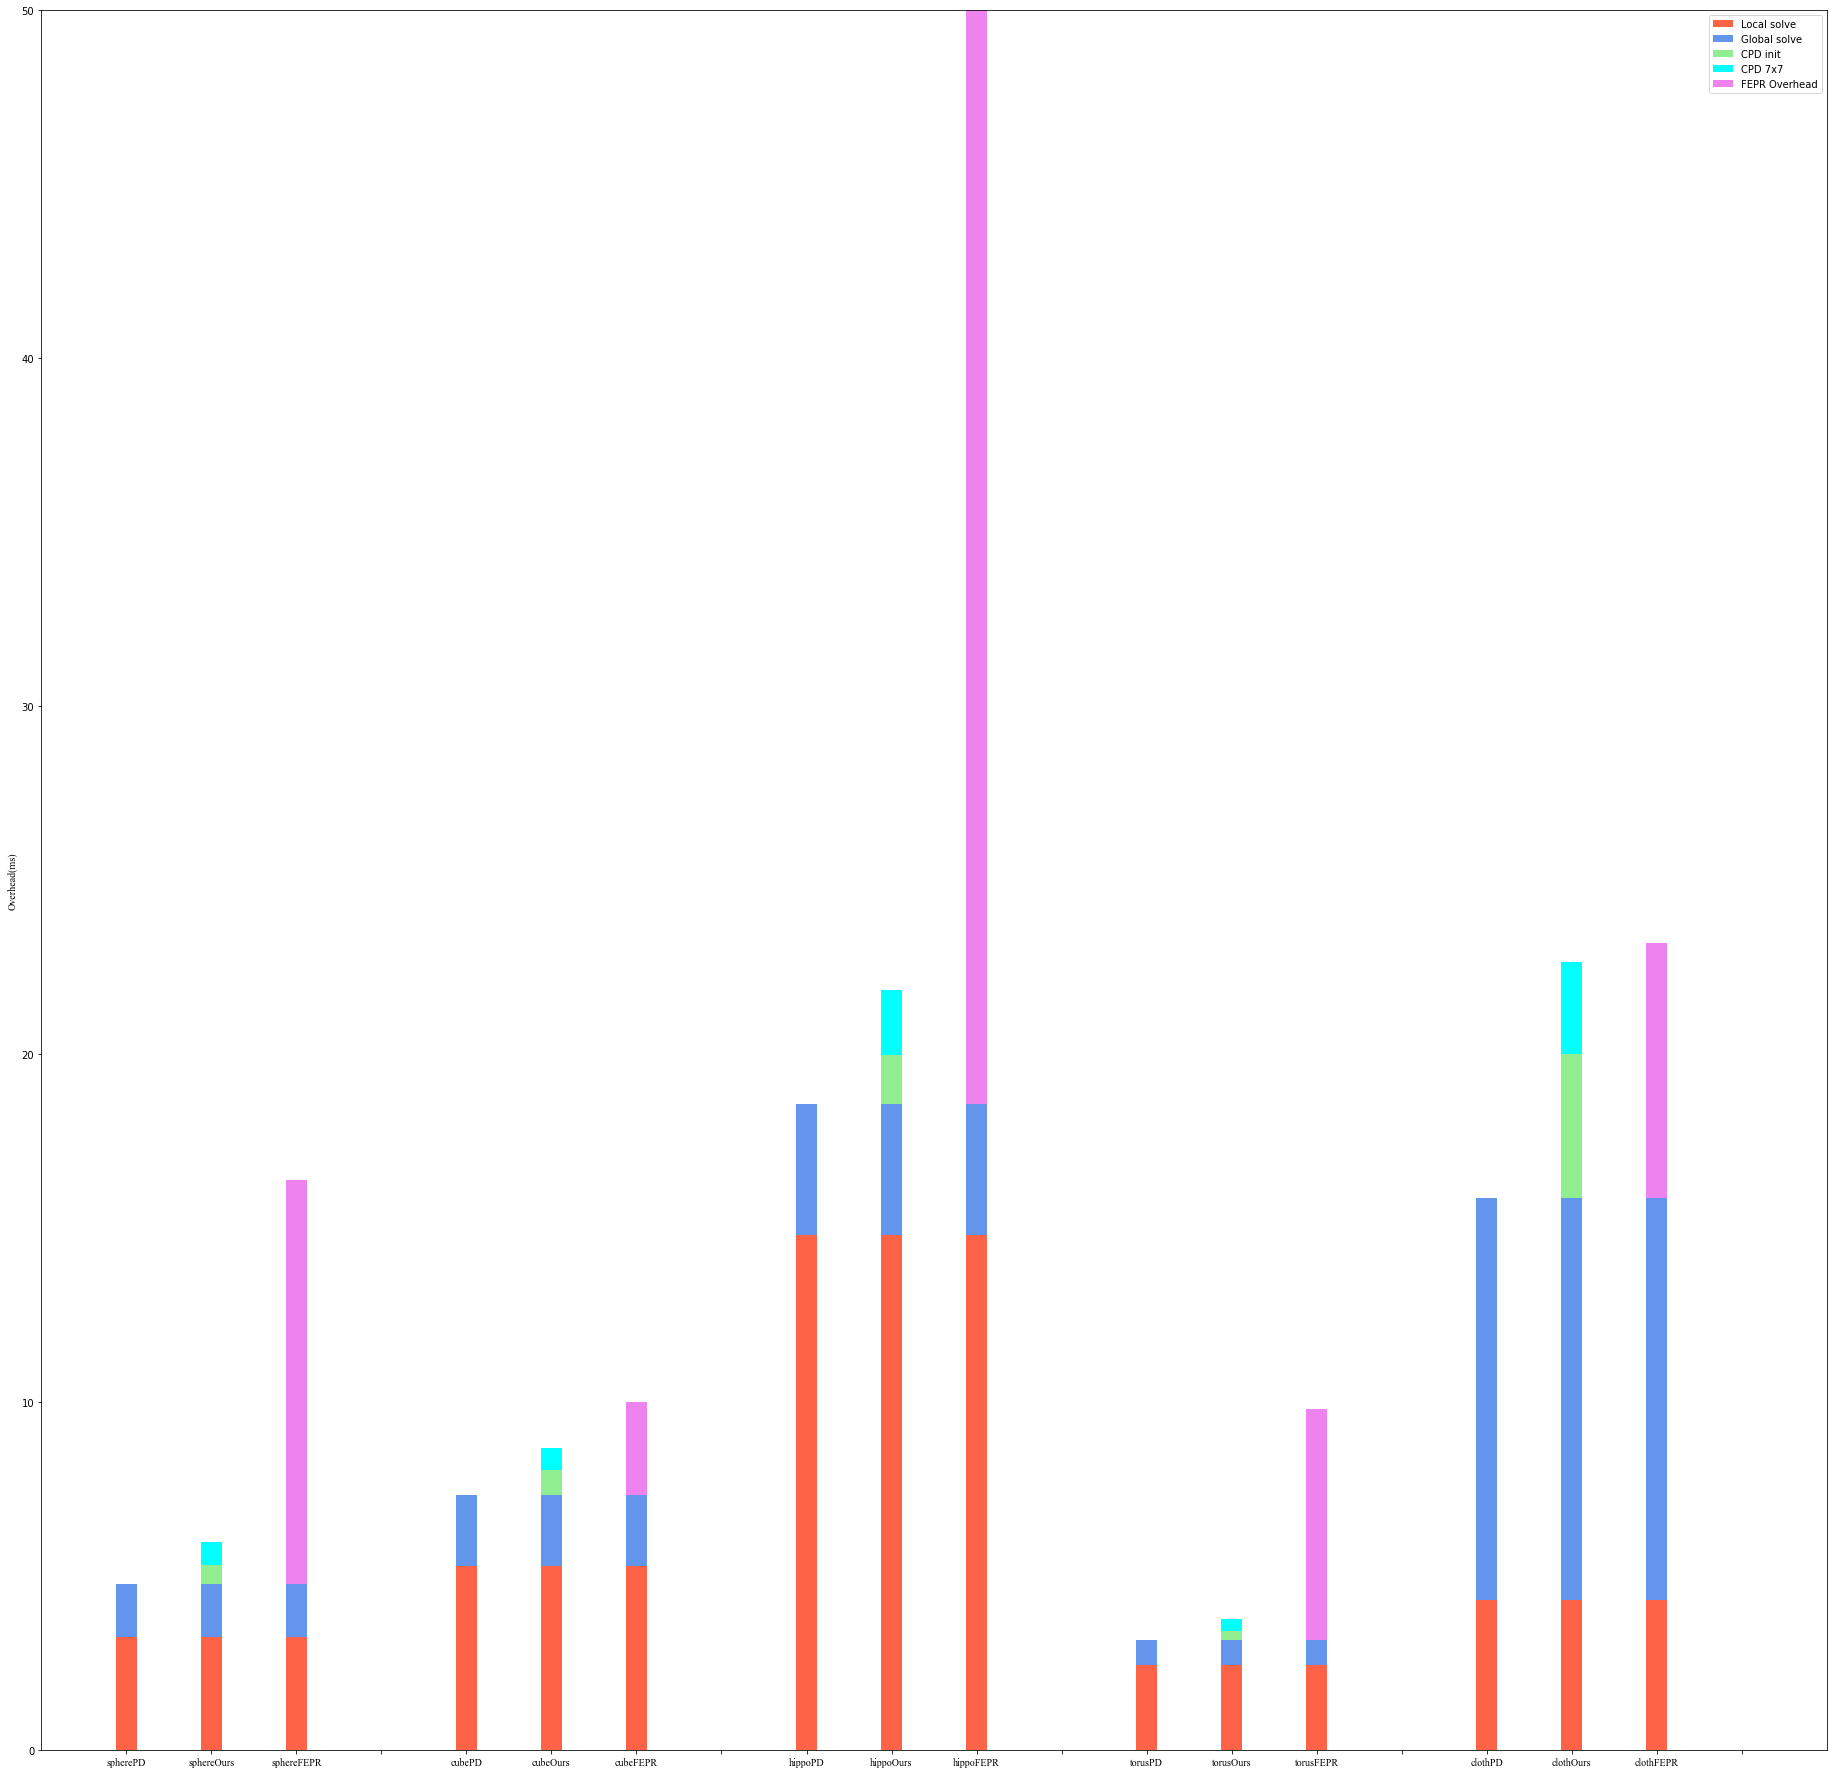

전체비 A/B:1.6476258942170903


In [103]:
x = np.arange(0, 20)


example = ['sphere', 'cube', 'hippo', 'torus', 'cloth']
method = ['PD', 'Ours', 'FEPR']

name = []

for word in example:
    for j in range(4):
        if j == 3:
            name.append('')
        else:
            name.append(word + method[j])

            
pitColor = ['tomato', 'cornflowerblue', 'lightgreen', 'violet', 'aqua']            
        
for w in range(3):
    if w == 0: # PD
        for i in range(5):
            if i == 0:
                plt.bar(i * 4, sumPDData[i * 2], width = 0.25, color = pitColor[0], label = 'Local solve')
            else:
                plt.bar(i * 4, sumPDData[i * 2], width = 0.25, color = pitColor[0])
        for i in range(1,6):
            if i == 1:
                plt.bar((i - 1) * 4, sumPDData[i * 2 - 1], width = 0.25, color = pitColor[1], bottom = sumPDData[(i - 1) * 2], label = 'Global solve')
            else:
                plt.bar((i - 1) * 4, sumPDData[i * 2 - 1], width = 0.25, bottom = sumPDData[(i - 1) * 2], color = pitColor[1])
                
    elif w == 1: # CPD OverHead
        for i in range(5):
            if i == 0:
                plt.bar(i * 4 + 1, dummyDataForOurs[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 1, sumCPDOverhead[i * 2], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2], color = pitColor[2], label = 'CPD init') #ours overhead
                plt.bar(i * 4 + 1, sumCPDOverhead[i * 2 + 1], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2] + sumCPDOverhead[i * 2], color = pitColor[4], label = 'CPD 7x7')
            else:
                plt.bar(i * 4 + 1, dummyDataForOurs[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 1, sumCPDOverhead[i * 2], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2], color = pitColor[2]) #ours overhead
                plt.bar(i * 4 + 1, sumCPDOverhead[i * 2 + 1], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2] + sumCPDOverhead[i * 2], color = pitColor[4])
        for i in range(1,6): 
            plt.bar((i - 1) * 4 + 1, dummyDataForOurs[i * 2 - 1], width = 0.25, bottom = dummyDataForOurs[(i - 1) * 2], color = pitColor[1])
            
    elif w == 2: # FEPR
        for i in range(5):
            if i == 0:
                plt.bar(i * 4 + 2, dummyDataForFEPR[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 2, sumFEPROverHead[i*2 + 1], width = 0.25, bottom = dummyDataForFEPR[i * 2 + 1] + dummyDataForFEPR[i * 2], color = pitColor[3], label = 'FEPR Overhead') #FEPR overhead
            else:
                plt.bar(i * 4 + 2, dummyDataForFEPR[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 2, sumFEPROverHead[i*2 + 1], width = 0.25, bottom = dummyDataForFEPR[i * 2 + 1] + dummyDataForFEPR[i * 2], color = pitColor[3]) #FEPR overhead
        for i in range(1,6):
            plt.bar((i - 1) * 4 + 2, dummyDataForFEPR[i * 2 - 1], width = 0.25, bottom = dummyDataForFEPR[(i - 1) * 2], color = pitColor[1])

csfont = {'fontname':'times new roman'}
    
plt.xticks(x, name, **csfont)
plt.ylabel('Overhead(ms)', **csfont)
plt.legend(loc='upper right')
plt.axis([-1, 20, 0, 50])

plt.rcParams["figure.figsize"] = (32, 32)
plt.savefig('C:/Users/JeongWooSeok/Desktop/test.png', dpi=200)
plt.show()

print("전체비 A/B:" + str(sum(dataRatio)/4))



In [136]:
a = "123\n a123\n"

b = a.split("\n")

#print(b)
print(a[a.find('a') + 1])

#a = a.replace(a[a.find('a')],'')
a = a[:a.find('a')] + a[a.find('a')+1:] # a 랑 그 뒤 하나 제거

print(a)


#find는 문자열 없으면 -1 반환

1
123
 123



In [47]:
filePath = "C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/"
#need to fix filePath!!

#testData = getData(filePath + "test.txt", 2, "\t", 2)
iterData = getData(filePath + "iterData/10test.txt", 2, "", 21)

#for i in range(20):
#    testData[i][0] = list(map(float, testData[i][0]))
#    testData[i][1] = list(map(int, testData[i][1]))

iterData = list(map(int, iterData))
    

#sumTime = sum(testData[1])/1000000


In [4]:
x = np.arange(0, 11)


sumLoss = np.zeros(10)

for i in range(20):
    plt.plot([0,1,2,3,4,5,6,7,8,9], testData[i][0][:10])


    
plt.axis([-1, 10, 0, 20000])    
plt.savefig('C:/Users/JeongWooSeok/Desktop/test2.png', dpi=200)
plt.show()

NameError: name 'np' is not defined

(-1.0, 100.0, 0.0, 105.0)

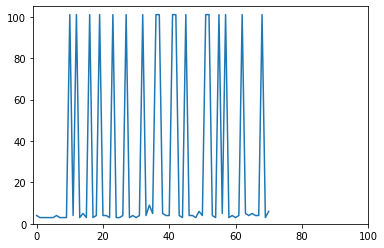

In [46]:

plt.plot(iterData)
plt.axis([-1, 100, 0, 105]) 

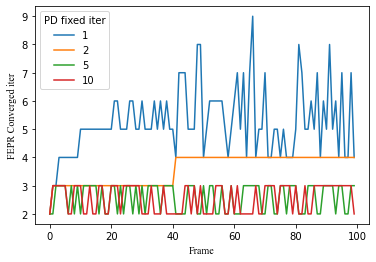

In [9]:
FEPRiter = []

for i in range(1,11):
    FEPRiter.append(getData(filePath + str(i) + "feprLossnOverhead.txt", 1 , "",21))

for i in range(0, 10):
    FEPRiter[i] = list(map(int, FEPRiter[i]))

csfont = {'fontname':'times new roman'}
    
plt.plot(FEPRiter[0], label = str(1))
plt.plot(FEPRiter[1], label = str(2))
plt.plot(FEPRiter[4], label = str(5))
plt.plot(FEPRiter[9], label = str(10))
    
plt.legend(loc='upper left', title="PD fixed iter")

plt.xlabel('Frame', **csfont)
plt.ylabel('FEPR Converged iter', **csfont)

plt.savefig('C:/Users/JeongWooSeok/Desktop/Graph1.png', dpi=200)

#PD iter 따라 FEPR iter 변화 살펴보는 그래프


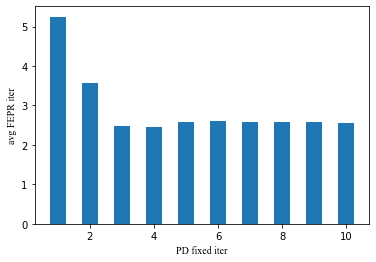

In [10]:
SUMFEPRiter = np.zeros(10)

for i in range(10):
    for j in range(len(FEPRiter[i])):
        SUMFEPRiter[i] += FEPRiter[i][j]
    SUMFEPRiter[i] /= 100
    
x = np.arange(1,11)    
plt.bar(x, SUMFEPRiter, width = 0.5)
plt.xlabel('PD fixed iter', **csfont)
plt.ylabel('avg FEPR iter', **csfont)

plt.savefig('C:/Users/JeongWooSeok/Desktop/Graph2.png', dpi=200)

# 위 그래프를 바 그래프로 표현

In [15]:
quantitiesData = getData(filePath + "cubeFEPRQuantities.txt", 300, " ", 5)

for i in range(300):
    for j in range(7):
        if quantitiesData[i][j].find('-') != -1:
                quantitiesData[i][j] = quantitiesData[i][j].replace("-", "")
    quantitiesData[i] = list(map(float, quantitiesData[i]))
#print(quantitiesData)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/TextData/cubeFEPRQuantities.txt'

(0.0, 700.0)

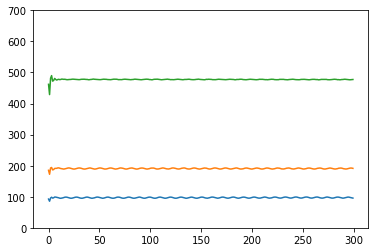

In [19]:
linearMomentum = [[],[],[]]
angularMomentum = [[],[],[]]
totalEnergy = []
for i in range(300):
    linearMomentum[0].append(quantitiesData[i][0])
    linearMomentum[1].append(quantitiesData[i][1])
    linearMomentum[2].append(quantitiesData[i][2])
    angularMomentum[0].append(quantitiesData[i][3])
    angularMomentum[1].append(quantitiesData[i][4])
    angularMomentum[2].append(quantitiesData[i][5])
    totalEnergy.append(quantitiesData[i][6])
    
#plt.plot(totalEnergy)
for i in range(3):
#plt.plot(linearMomentum[i])
    plt.plot(angularMomentum[i])
    
plt.ylim(0,700)

#FEPR의 에너지량을 프레임단위로 보기.

In [77]:
CPDiterData = [[] for i in range(5)]
FPERiterData = []
example = ['sphere', 'cube', 'hippo', 'torus', 'cloth']

for i in range(5):
    CPDiterData[i] = getData(filePath + example[i] + "CPDOverHead.txt", 0, "", 4)
    FPERiterData.append(getData(filePath + "10" + example[i] + "feprLossnOverhead.txt", 0, "", 21))

for i in range(5):
    CPDiterData[i][0] = list(map(float, CPDiterData[i][0]))
    CPDiterData[i][1] = list(map(int,CPDiterData[i][1]))
    FPERiterData[i] = list(map(int,FPERiterData[i]))
#




In [78]:
frame = 300

sumCPDiter = []
sumFPERiter = []

for i in range(5):
    sumCPDiter.append(sum(CPDiterData[i][1])/frame)
    sumFPERiter.append(sum(FPERiterData[i])/frame + 10)

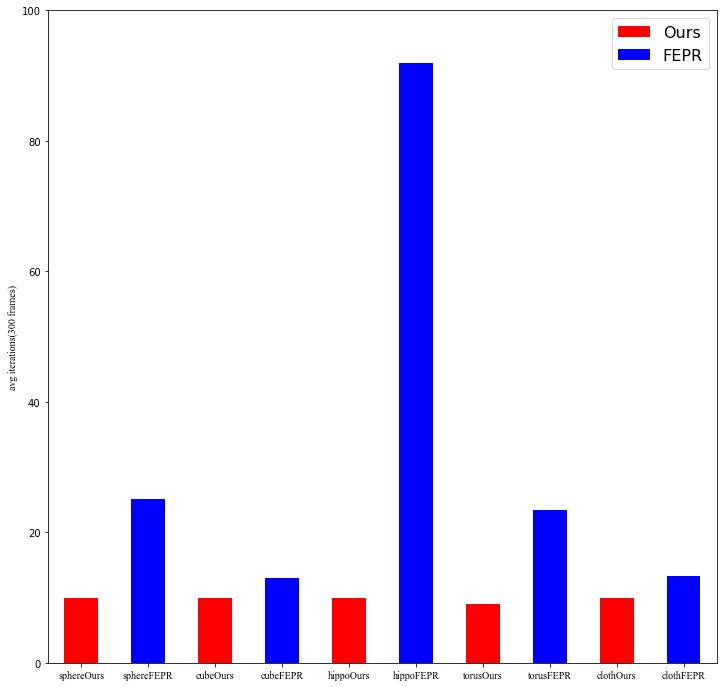

In [82]:
x = np.arange(10)

name = []
for i in range (5):
    name.append(example[i] + "Ours")
    name.append(example[i] + "FEPR")

for i in range(5):
    if(i == 0):
        plt.bar(i * 2, sumCPDiter[i], width = 0.5, color = "red", label = "Ours")
        plt.bar(i * 2 + 1, sumFPERiter[i], width = 0.5, color = "blue", label = "FEPR")
    else:
        plt.bar(i * 2, sumCPDiter[i], width = 0.5, color = "red")
        plt.bar(i * 2 + 1, sumFPERiter[i], width = 0.5,color = "blue")
    
csfont = {'fontname':'times new roman'}

plt.xticks(x, name, **csfont)
plt.ylabel('avg iterations(300 frames)', **csfont)
plt.axis([-0.5, 9.5, 0, 100])
plt.legend(loc='upper right', fontsize = 16)

plt.rcParams["figure.figsize"] = (12, 12)

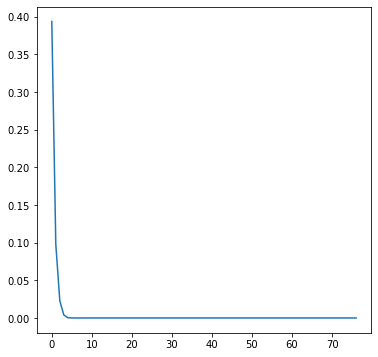

In [123]:
a = getData(filePath + "cubeCPDLoss.txt", 1, "\t", 32)

a[0] = list(map(float, a[0]))

plt.plot(a[0])
#plt.axis([-0.5, 80, 0, 0.00001])
plt.rcParams["figure.figsize"] = (6, 6)
plt.savefig('C:/Users/JeongWooSeok/Desktop/good.png', dpi=200)